# Regression analysis

In [579]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_values4 = pd.read_csv("df_values4.csv")
df_values4.head()

,Unnamed: 0,index,population_density,median_age,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,Asthma Prevalence (m/f) Age-standardized,PM2.5 air pollution,Daily smoking prevalence,Prevalence of obesity (both sexes) - WHO (2019),CFR,anomaly
0,0,0,54.422,18.6,1.337,1803.987,597.029,9.59,0.50,64.83,0.498,6.215770,62.854857,11.900000,5.5,0.036814,1
1,1,1,104.871,38.0,8.643,11803.431,304.195,10.08,2.89,78.57,0.785,2.870007,14.634008,20.500000,21.7,0.029834,1
2,2,2,17.348,29.1,3.857,13913.839,278.364,6.73,1.90,76.88,0.754,6.127563,37.230956,11.200000,27.4,0.033503,1
3,3,6,231.845,32.1,4.631,21490.943,191.511,13.17,3.80,77.02,0.780,7.543192,15.685943,3.400000,18.9,0.031579,1
4,4,7,16.177,31.9,7.441,18933.907,191.032,5.50,5.00,76.67,0.825,4.820861,14.148167,19.299999,28.3,0.020912,1


In [580]:
#Normalize 
df4_scaled = StandardScaler().fit_transform(df_values4)
df_norm1 = pd.DataFrame(df4_scaled)#Transform numpy into a dataframe

In [581]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error 

pred2 = []; pred3 = []; pred4 = []; pred5 = [] #Initialize lists for prediction values
R2a = []; R3a = []; R4a = []; R5a = [] #Initialize lists for RSME scores
kfold = range(20) #number of iterations

# K fold cross validation
for i in kfold:
    #split train and test data randomly with 20% test and 80% train data
    train, test = train_test_split(df_norm1, test_size=0.2)
    #y is the target variable CFR
    x_train = train.iloc[:,2:15] 
    x_test = test.iloc[:,2:15] 
    y_train = train.iloc[:,15]
    y_test = test.iloc[:,15]
    
    #Train PLS model
    PLS2 = PLSRegression(n_components=2).fit(x_train,y_train)
    PLS3 = PLSRegression(n_components=3).fit(x_train,y_train)
    PLS4 = PLSRegression(n_components=4).fit(x_train,y_train)
    PLS5 = PLSRegression(n_components=5).fit(x_train,y_train)
    
    #Predict y using the trained model
    y_predP2 = PLS2.predict(x_test); y_predP3 = PLS3.predict(x_test);
    y_predP4 = PLS4.predict(x_test); y_predP5 = PLS5.predict(x_test)
    
    #Append the test results for each kfold iteration in pred{x}
    pred2.append(y_predP2); pred3.append(y_predP3);
    pred4.append(y_predP4); pred5.append(y_predP5)

    #The pred{x} lists are 10x longer than the number of predicted values for each iteration. Here, they are 
    #transformed into dataframes of dimension 42,10

    #convert lists in arrays (3d)
    pred2a = np.array(pred2) ; pred3a = np.array(pred3); pred4a = np.array(pred4); pred5a = np.array(pred5) 
    # delete third dimension
    pred2a = pred2a[:, :, 0]; pred3a = pred3a[:, :, 0]; 
    pred4a = pred4a[:, :, 0]; pred5a = pred5a[:, :, 0]

    #transform so each iteration is a column
    pred2a = pd.DataFrame(pred2a.T)
    pred3a = pd.DataFrame(pred3a.T)
    pred4a = pd.DataFrame(pred4a.T)
    pred5a = pd.DataFrame(pred5a.T)
    
    #Determine the RSME of each iteration and latent variable
    RMSE_P2a = np.sqrt(mean_squared_error(y_test,pred2a.iloc[:,i]))
    RMSE_P3a = np.sqrt(mean_squared_error(y_test,pred3a.iloc[:,i]))
    RMSE_P4a = np.sqrt(mean_squared_error(y_test,pred4a.iloc[:,i]))
    RMSE_P5a = np.sqrt(mean_squared_error(y_test,pred5a.iloc[:,i]))
    
    #Append the RSME values to R{x}a for each kfold iteration
    R2a.append(RMSE_P2a)
    R3a.append(RMSE_P3a)
    R4a.append(RMSE_P4a)
    R5a.append(RMSE_P5a)

    i = i+1
    
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)    
print(min(R2a), min(R3a), min(R4a), min(R5a))

(111, 13) (111,) (28, 13) (28,)
0.7417491921833592 0.72930340477653 0.7252420595559574 0.730341844739786


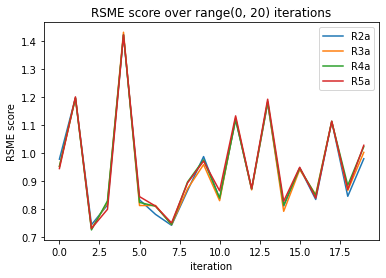

In [590]:
#Plot the RSME over the iterations
plt.plot(R2a); plt.plot(R3a); plt.plot(R4a); plt.plot(R5a)
plt.title('RSME score over ' + str(kfold) + ' iterations')
plt.xlabel('iteration')
plt.ylabel('RSME score')
plt.legend(['R2a', 'R3a', 'R4a', 'R5a'])

In [597]:
# Merge each number of latent variables in one datafram
R2a = pd.DataFrame(R2a); R3a = pd.DataFrame(R3a); R4a = pd.DataFrame(R4a); R5a = pd.DataFrame(R5a)
R2x = pd.concat([R2a, R3a, R4a, R5a], axis=1)
R2x.columns = [['2lat', '3lat', '4lat', '5lat']]

# add index values
R2x['index'] = kfold

# Subset each column + index 
r2x2 = R2x[['2lat', 'index']]
r2x3 = R2x[['3lat', 'index']]
r2x4 = R2x[['4lat', 'index']]
r2x5 = R2x[['5lat', 'index']]

# Get the iteration with the smallest RSME value for each number of latent variables
L2 = r2x2.iloc[:,1][r2x2.iloc[:,0] == r2x2.iloc[:,0].min()]
L3 = r2x3.iloc[:,1][r2x3.iloc[:,0] == r2x3.iloc[:,0].min()]
L4 = r2x4.iloc[:,1][r2x4.iloc[:,0] == r2x4.iloc[:,0].min()]
L5 = r2x5.iloc[:,1][r2x5.iloc[:,0] == r2x5.iloc[:,0].min()]

# List each iteration with the minimal RSME
R_index = []
R_index.append(L2.iloc[0]); R_index.append(L3.iloc[0]); R_index.append(L4.iloc[0]);
R_index.append(L5.iloc[0])

R_index = pd.DataFrame(R_index)
R_index = np.array(R_index.iloc[:,0])
R_index

array([7, 2, 2, 2], dtype=int64)

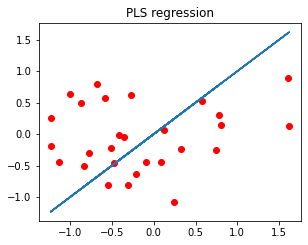

In [598]:
#Select the iterations with the minimum RSME
pred2b = pred2a.iloc[:,int(R_index[0])]
pred3b = pred3a.iloc[:,int(R_index[1])]
pred4b = pred4a.iloc[:,int(R_index[2])]
pred5b = pred5a.iloc[:,int(R_index[3])]

#Plot predicted target values against the real target values
ax1 = plt.figure(figsize=(16,8))
ax1=plt.subplot(231)
ax1.scatter(y_test,pred3b,c='red')
ax1.set_title('PLS regression')
ax1.plot(y_test, y_test)



In [587]:

x = df_norm1.iloc[:,2:15] 
y = df_norm1.iloc[:,15] #CFR
x.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.436011,-1.444607,-1.113489,-0.958137,2.987489,0.641913,-1.121513,-1.280372,-1.551508,0.758142,1.301107,-0.642406,-1.537415
1,-0.181332,0.801301,0.666281,-0.361438,0.430485,0.789803,0.003379,0.777052,0.436362,-1.313200,-0.663076,0.442091,0.389424
2,-0.623170,-0.229038,-0.499607,-0.235503,0.204931,-0.221281,-0.462580,0.523992,0.221644,0.703533,0.257367,-0.730679,1.067386
3,0.459665,0.118267,-0.311058,0.216648,-0.553462,1.722416,0.431686,0.544956,0.401730,1.579940,-0.620227,-1.714293,0.056390
4,-0.629081,0.095113,0.373469,0.064061,-0.557645,-0.592515,0.996486,0.492547,0.713417,-0.105438,-0.682865,0.290766,1.174432


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression

LR = LinearRegression(normalize=True).fit(x, y)
PLS = PLSRegression(n_components=2).fit(x,y)

scoreL = []
scoreP = []

# CV: Find the number of folds, leading to the highest R2 score
for i in range(2,20):
    scoresL = cross_val_score(LR, x, y, cv=i)
    scoresP = cross_val_score(PLS, x, y, cv=i)

    scoreL.append(scoresL.mean())
    scoreP.append(scoresP.mean())

max(scoreL), max(scoreP)
# plt.plot(scoreL)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=0, oob=True).fit(x,y)
RFR_R2 = RFR.score(x,y)
RFR_R2

In [ ]:
from sklearn.model_selection import cross_val_predict
y_predL = cross_val_predict(LR, x, y, cv=5)
y_predP = cross_val_predict(PLS, x, y, cv=5)
y_predR = cross_val_predict(RFR, x, y, cv=5)
y_predL.shape, y_predP.shape, y_predR.shape

In [ ]:
LR2 = LinearRegression()
LR2 = LR2.fit(x,y)
y_predL2 = cross_val_predict(LR2, x, y, cv=5)
RMSE_L = np.sqrt(mean_squared_error(y,y_predL2))
RMSE_L

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import linear_model

lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, x, y, cv=5)
RMSE = np.sqrt(mean_squared_error(y,y_pred))
print(RMSE)
plt.scatter(y,y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error 
RMSE_L = np.sqrt(mean_squared_error(y,y_predL))
RMSE_P = np.sqrt(mean_squared_error(y,y_predP))
RMSE_R = np.sqrt(mean_squared_error(y,y_predR))

RMSE_L, RMSE_P, RMSE_R

In [ ]:
#Plot predicted target values against the real target values

ax = plt.figure(figsize=(16,8))
ax1=plt.subplot(231)
ax1.scatter(y,y_predL,c='red')
ax1.set_title('Linear regression')
ax1.plot(y_test, y_test)
ax1.set_xlabel('actual value')
ax1.set_ylabel('predicted value')
ax1.text(0.7,-1.0, 'RMSE ='+str(round(RMSE_L,3)))

ax2=plt.subplot(232)
ax2.scatter(y,y_predP,c='red')
ax2.plot(y_test, y_test)
ax2.set_title('PLS regression')
ax2.set_xlabel('actual value')
ax2.set_ylabel('predicted value')
ax2.text(0.7,-1.0, 'RMSE ='+str(round(RMSE_P,3)))

ax3=plt.subplot(233)
ax3.scatter(y,y_predR,c='red')
ax3.plot(y_test, y_test)
ax3.set_title('Random forest regression')
ax3.set_xlabel('actual value')
ax3.set_ylabel('predicted value')
ax3.text(0.7,-1.0, 'RMSE ='+str(round(RMSE_R,3)))

In [ ]:
#RF feature importances
df_values5 = df_values4.drop(df_values4[['Unnamed: 0', 'index', 'anomaly', 'CFR']], axis=1)

plt.barh(np.array(df_values5.columns), RFR.feature_importances_)
plt.title('Random forest feature importances')
plt.xlabel('Feature importance')

# No cross validation

In [ ]:
# #Make predictions -> no cv yet
y_predL = LR.predict(x_test)
y_predP = PLS.predict(x_test)
y_predR = RFR.predict(x_test)
y_predL.shape, y_predP.shape, y_predR.shape

In [ ]:
#making sure the test and prediction sets have the same shape
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
y_test = np.array(y_test)

In [ ]:
#Determine the root mean square value
from sklearn.metrics import mean_squared_error 
RMSE_L = np.sqrt(mean_squared_error(y_test,y_predL))
RMSE_P = np.sqrt(mean_squared_error(y_test,y_predP))
RMSE_R = np.sqrt(mean_squared_error(y_test,y_predR))

RMSE_L, RMSE_P, RMSE_R

In [ ]:
#Plot predicted target values against the real target values

ax = plt.figure(figsize=(16,8))
ax1=plt.subplot(231)
ax1.scatter(y_test,y_predL,c='red')
ax1.set_title('Linear regression')
ax1.plot(y_test, y_test)
ax1.set_xlabel('actual value')
ax1.set_ylabel('predicted value')
ax1.text(0.7,-1.0, 'RMSE ='+str(round(RMSE_L,3)))

ax2=plt.subplot(232)
ax2.scatter(y_test,y_predP,c='red')
ax2.plot(y_test, y_test)
ax2.set_title('PLS regression')
ax2.set_xlabel('actual value')
ax2.set_ylabel('predicted value')
ax2.text(0.7,-1.0, 'RMSE ='+str(round(RMSE_P,3)))

ax3=plt.subplot(233)
ax3.scatter(y_test,y_predR,c='red')
ax3.plot(y_test, y_test)
ax3.set_title('Random forest regression')
ax3.set_xlabel('actual value')
ax3.set_ylabel('predicted value')
ax3.text(0.7,-1.0, 'RMSE ='+str(round(RMSE_R,3)))

In [ ]:
from tabulate import tabulate

# Compare coefficients between LR and PLS and RFR
df_values5 = df_values4.drop(df_values4[['Unnamed: 0', 'index', 'anomaly', 'CFR']], axis=1)
col = pd.DataFrame(df_values5.columns)
coefLR = pd.DataFrame(abs(LR.coef_))
coefPLS = pd.DataFrame(abs(PLS.coef_))
RFR_imp = pd.DataFrame(RFR.feature_importances_)

df5 = pd.concat([col, coefLR, coefPLS, RFR_imp], axis=1)
print(tabulate(df5, headers= ['feature', 'LR_imp', 'PLS_imp', 'RFR_imp'], tablefmt='presto'))

In [ ]:
ax = plt.figure(figsize=(16,8))
ax1=plt.subplot(221)
ax1.barh(np.array(df_values5.columns), PLS.coef_)

In [ ]:
ax = plt.figure(figsize=(16,8))
ax1=plt.subplot(221)
ax1.barh(np.array(df_values5.columns), LR.coef_)
ax1.set_title('LR feature coefficients')

In [ ]:
df_values5.columns.shape, RFR.feature_importances_.shape

In [ ]:
#RF feature importances
plt.barh(np.array(df_values5.columns), RFR.feature_importances_)
plt.title('Random forest feature importances')
plt.xlabel('Feature importance')